# Аналитика в авиакомпании

# Описание проекта

Для развития компании важно понять предпочтения пользователей, покупающих билеты на разные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

# Описание данных

Первый датасет — результат первого запроса. В нём содержится информация о:

- model — модели самолета

- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

Второй датасет — результат третьего запроса. В нём содержится информация о:

- city — городах

- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [29]:
import pandas as pd
import numpy as np

In [14]:
import matplotlib.pyplot as plt
import matplotlib

In [2]:
flights = pd.read_csv('/datasets/query_1.csv')

In [3]:
city = pd.read_csv('/datasets/query_3.csv')

Импортировали данные, рассмотрим их содержание.

In [4]:
print(flights.head())
print(flights.describe)
print(flights.info())

             model  flights_amount
0  Airbus A319-100             607
1  Airbus A321-200             960
2   Boeing 737-300             630
3   Boeing 767-300             600
4   Boeing 777-300             300
<bound method NDFrame.describe of                  model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


In [5]:
print(city.head())
print(city.describe)
print(city.info())

          city  average_flights
0       Абакан         3.870968
1      Анадырь         1.000000
2        Анапа         2.161290
3  Архангельск         5.354839
4    Астрахань         2.451613
<bound method NDFrame.describe of                city  average_flights
0            Абакан         3.870968
1           Анадырь         1.000000
2             Анапа         2.161290
3       Архангельск         5.354839
4         Астрахань         2.451613
..              ...              ...
96             Чита         1.580645
97           Элиста         4.870968
98   Южно-Сахалинск         4.290323
99           Якутск         2.741935
100       Ярославль         1.322581

[101 rows x 2 columns]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


## 2 шаг. Предобработка данных

In [6]:
flights.isna().sum()

model             0
flights_amount    0
dtype: int64

In [7]:
city.isna().sum()

city               0
average_flights    0
dtype: int64

Видим, что пропущенных значений нет, данные полные.

## 3 шаг. Анализ.

In [8]:
city1 = city.sort_values(by='average_flights', ascending=False).head(10)

In [9]:
city1

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Нашли 10 городов, в которые чаще всего летают люди.

Построим графики функций зависимости количества рейсов от модели самолетов, количества рейсов от города, количества рейсов от топ-10 городов

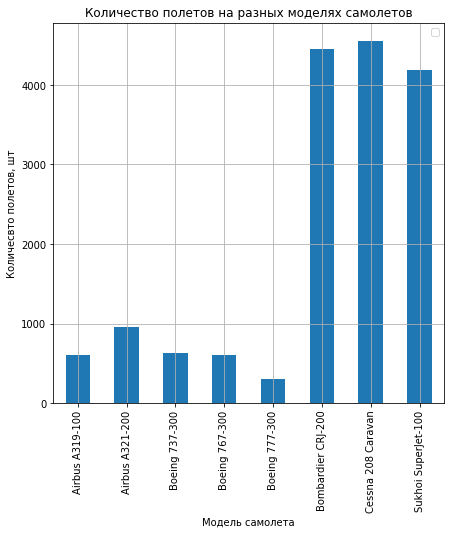

In [26]:
flights.plot(y='flights_amount', x='model', kind='bar', figsize=(7,7), grid=True)
plt.xticks(rotation=90)
plt.title('Количество полетов на разных моделях самолетов')
plt.xlabel('Модель самолета')
plt.ylabel('Количесвто полетов, шт')
plt.legend([])
plt.show()

Видим, что больше всего полетов было совершено на самолетах Бомбардир и Сухой-суперджет.

In [44]:
most_cities = city[city['average_flights']>5]

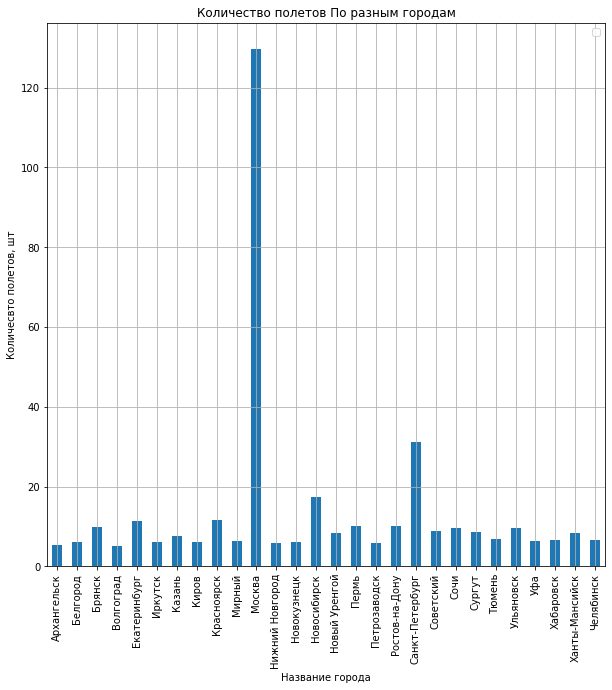

In [45]:
most_cities.plot(x='city', y='average_flights', kind = 'bar', figsize=(10,10), grid=True)
plt.xticks(rotation=90)
plt.title('Количество полетов По разным городам')
plt.xlabel('Название города')
plt.ylabel('Количесвто полетов, шт')
plt.legend([])
plt.show()

Видно, что наибольшее количество перелетов - в Москве.

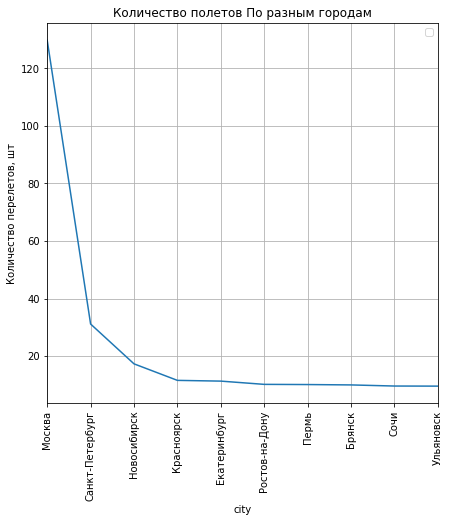

In [46]:
city1.plot(x='city', y='average_flights', figsize=(7,7), grid=True)
plt.xticks(rotation=90)
plt.title('Количество полетов По разным городам')
plt.legend([])
plt.ylabel('Количество перелетов, шт')
plt.show()

Видим, что наибольшее количество перелетов были произведены в Москве и Санкт-Петербурге.

# Вывод

Видим, что наибольшее колчиество перелетов было произведено в Москву, а также в Петербург, где проходят крупнейшие фестивали. По графикам видно, что наибольшей популяронстью пользуются две столицы, в другие города было произведено не так много перелетов. Скорее всего, в региональных городах были не такие крупные фестивали.